In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#make some time series drawn from a normal distribution
ts=np.random.normal(size=1000)

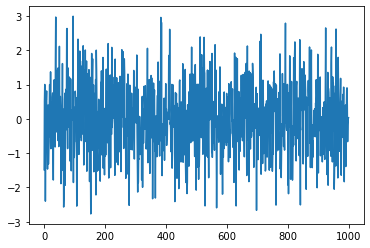

In [4]:
plt.plot(ts)

# Simple Block Bootstrap

100 possibilties for each block


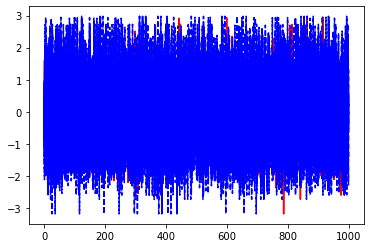

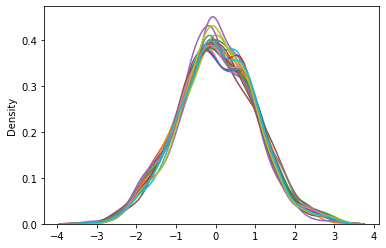

In [31]:
#get length of ts
N = len(ts)
#specify size of block, must be an integer; higher block size leads to new_ts resemble ts more closely
b = 10
concat_count = int(N/b)
#raise flag if b is not a multiple of N
remainder = N % b 
if remainder!=0:
    print('Error: The specified block size is not a multiple of N')
else:
    #prepare blocks: make bxk array from original ts
    nrows=int (N/b)
    print(nrows,'possibilties for each block')
    ncols=b
    sectioned_ts = ts.reshape(nrows,ncols)
    #randomly select rows of the sectioned ts
    #randomly choose row index with range 0 to (L/b)-1
    limit = nrows-1
    #generate a bootstrapped series consisting of blocks,length same as original
    fig, ax =plt.subplots(1,1)
    ax.plot(ts,color='red')
    fig1, ax1 = plt.subplots(1,1)
    sns.kdeplot(ts,ax=ax1,color='red')
    nsim = 20
    iter=0
    base_seed=20
    for _ in range(nsim):
        new_ts = []
        iter = iter+ 1
        random.seed(base_seed+iter)
        #print('seed is',10+iter)
        for i in range(concat_count): 
            random_row_index = random.choice(range(nrows))
            #print(random_row_index)
            #print(random_row_index)
            block = sectioned_ts[random_row_index,:]
            new_ts.append(block)
        #print('next batch')  
        new_ts=np.hstack(new_ts)
        #print(np.mean(new_ts))
        ax.plot(new_ts,'--b')
        sns.kdeplot(new_ts,ax=ax1)
    plt.show();

# Moving Block Bootstrap

991 possibilities for each block


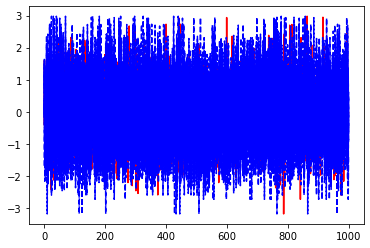

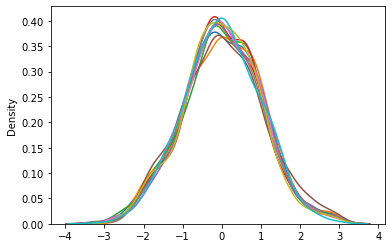

In [32]:
as_strided = np.lib.stride_tricks.as_strided
#get length of ts
N = len(ts)
#specify size of block, must be an integer; higher block size leads to new_ts resemble ts more closely
b = 10
nrows = N-b+1
ncols = b
#section the ts into overlapping arrays
sectioned_ts = as_strided(ts, (nrows,ncols), ts.strides*2)
concat_count = int(N/b)
new_ts = []
#raise flag if b is not a multiple of N
remainder = N % b 
if remainder!=0:
    print('Error: The specified block size is not a multiple of N')
else:
    print(nrows,'possibilities for each block')
    fig, ax = plt.subplots(1,1)
    fig1, ax1 = plt.subplots(1,1)
    ax.plot(ts,color='red')
    sns.kdeplot(ts,ax=ax1,color='red')
    nsim = 10
    iter=0
    base_seed=20
    for _ in range(nsim):
        new_ts = []
        iter = iter+ 1
        random.seed(base_seed+iter)
        for i in range(concat_count): #number of concatenations
            #random.seed(10)
            #print(i)
            random_row_index = random.choice(range(nrows))
            #print(random_row_index)
            block = sectioned_ts[random_row_index,:]
            new_ts.append(block)
        new_ts = np.hstack(new_ts)
        #print(np.mean(new_ts))
        ax.plot(new_ts,'--b')
        sns.kdeplot(new_ts,ax=ax1)
    plt.show();

In [ ]:
# Stationary Block Boostrapping